## Figure 5

In [2]:
##loading TiRP utility functions:
source("../utils.R")

In [6]:
path_to_results <- "/Users/klagattu/Documents/GitHub/TiRP/results"

### *Replicating TCR feature effects in an independent cohort*

We tested whether the observed associations between TCR features and Treg-Tconv fate in the Seay et al. 2016 would replicate in an independent cohort (Gomez-Tourino et al. 2017, https://www.nature.com/articles/s41467-017-01925-2).

As in the first cohort, we used mixed effects logistic regression to estimate the effect of each TCR feature on Treg versus Tconv fate (see *meLR_midregion.R* for documentation). 

#### Percent composition of CDR3bmr amino acids

First, we compare the effect sizes in the discovery and replication cohorts for each of the 15 amino acids identified by forward selection (**Figure 3b**) as significant contributors to Treg fate in the CDR3bmr.

Here, effect size is measured as the ratio in odds of Treg status observed with one standard deviation increase in CDR3mr occupancy for the given amino acid, adjusted for CDR3b length and the other 14 relevant amino acids.

In [2]:
pm = read.csv(paste(path_to_results, "TCRfeat_effectsizes/midregion_positionalAA/seayvGT_percmid.csv", sep="/"))

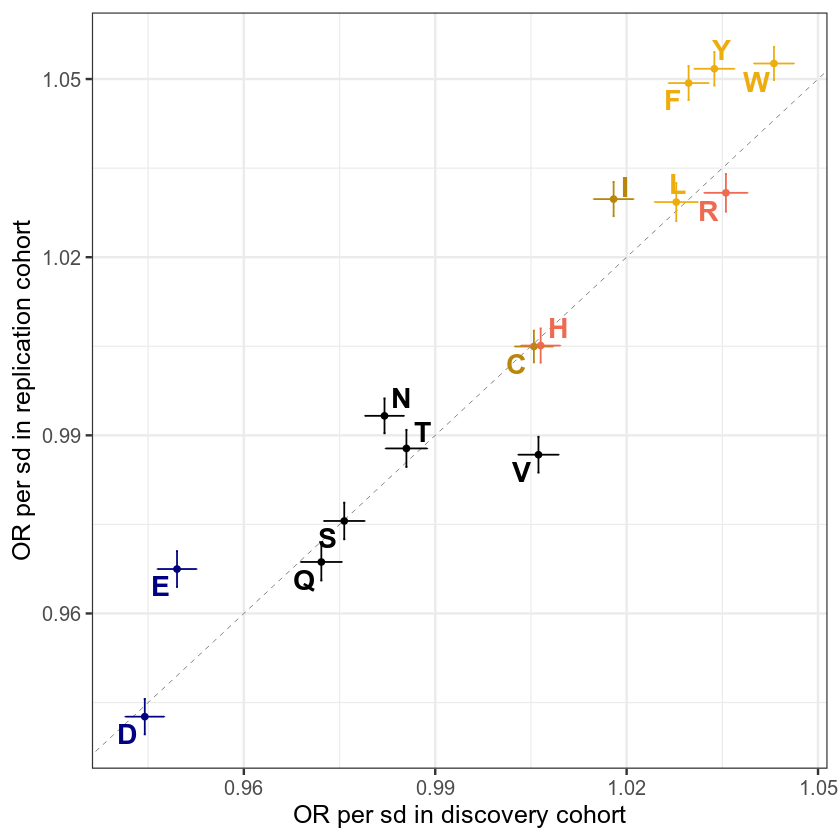

In [3]:
g = ggplot(pm[(grepl("perc_mid", pm$term)),], aes(seay_OR, GT_OR, color=group, label=AA))
g = g + geom_abline(linetype="dashed", size=0.1) + geom_point(show.legend=FALSE) + geom_errorbar(aes(xmin=seay_minOR, xmax = seay_maxOR), show.legend = FALSE) + geom_errorbar(aes(ymin=GT_minOR, ymax = GT_maxOR), show.legend = FALSE)  +  geom_text_repel(fontface="bold", size=6, show.legend=FALSE) + theme_bw(base_size=15) 
g = g + scale_color_manual(values=c("navyblue", "coral2", "darkgoldenrod", "black", "darkgoldenrod2")) + xlab("") + ylab("")
g + xlab("OR per sd in discovery cohort") + ylab("OR per sd in replication cohort")

*amino acids colored by physiochemical group: 
blue = acidic, red = basic, black = neutral, yellow = hydrophobic (**Extended Data Figure 1h**)*

#### V and J region TCR features

In [22]:
spos = collect_midreg_effectsizes(paste(path_to_results, "TCRfeat_effectsizes/midregion_positionalAA/seay2016/wperccovs", sep="/"), "seay")
gtpos = collect_midreg_effectsizes(paste(path_to_results, "TCRfeat_effectsizes/midregion_positionalAA/gt2017/wperccovs", sep="/"), "GT")

In [23]:
pos_betas = left_join(spos, gtpos, by="term")
pos_betas = convert_to_IMGTpos(pos_betas)

In [39]:
sv = collect_vj_effectsizes(paste(path_to_results, "TCRfeat_effectsizes/Vregion/seay2016/seaytrain_vregion.RData", sep="/"), "seay", "V")
gv = collect_vj_effectsizes(paste(path_to_results, "TCRfeat_effectsizes/Vregion/gt2017/gttrain_vregion.RData", sep="/"), "GT", "V")

In [41]:
v_betas = left_join(sv, gv, by="term")

In [42]:
sv = collect_vj_effectsizes(paste(path_to_results, "TCRfeat_effectsizes/Jregion/seay2016/seaytrain_jregion.RData", sep="/"), "seay", "J")
gv = collect_vj_effectsizes(paste(path_to_results, "TCRfeat_effectsizes/Jregion/gt2017/gttrain_jregion.RData", sep="/"), "GT", "J")

In [43]:
j_betas = left_join(sv, gv, by="term")

In [44]:
v_betas$type = "Vreg"
v_betas$pos = "vgene"
v_betas$pos[!(grepl("vgene", v_betas$term))] = "p107"
j_betas$type = "Jreg"
j_betas$pos = "Jmotif"
j_betas$pos[!(grepl("Jmotif", j_betas$term))] = "p113"

In [51]:
all_betas = rbind(pos_betas, v_betas, j_betas)

In [52]:
all_betas$type = factor(all_betas$type, levels=c("Jreg", "mid", "Vreg"))
all_betas = all_betas[order(all_betas$type),]
all_betas$seay_OR = exp(all_betas$seay_estimate)
all_betas$GT_OR = exp(all_betas$GT_estimate)
all_betas$seay_minOR = exp(all_betas$seay_estimate + (qnorm(0.025)*all_betas$seay_std.error))
all_betas$seay_maxOR = exp(all_betas$seay_estimate + (qnorm(0.975)*all_betas$seay_std.error))
all_betas$GT_minOR = exp(all_betas$GT_estimate + (qnorm(0.025)*all_betas$GT_std.error))
all_betas$GT_maxOR = exp(all_betas$GT_estimate + (qnorm(0.975)*all_betas$GT_std.error))

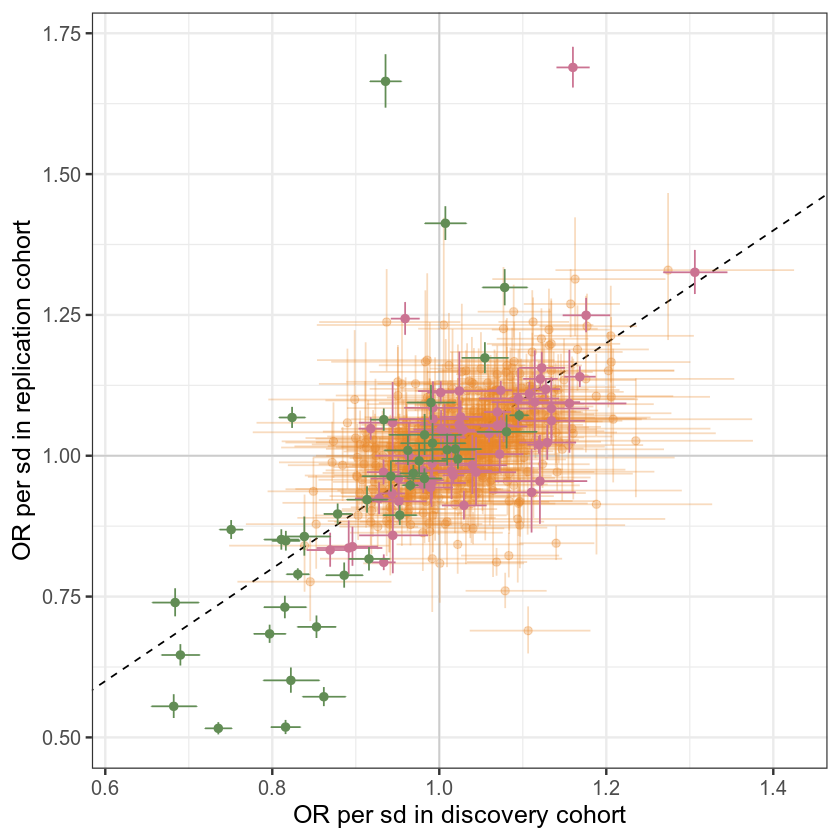

In [53]:
g = ggplot()
g = g + geom_point(aes(x=all_betas$seay_OR[all_betas$type=="mid"], y=all_betas$GT_OR[all_betas$type=="mid"]), size=2, color="#e7862b", alpha=0.3) + geom_vline(xintercept=1, color="gray80") + geom_hline(yintercept=1, color="gray80") + geom_abline(linetype="dashed") + geom_errorbar(aes(x=all_betas$seay_OR[all_betas$type=="mid"], y=all_betas$GT_OR[all_betas$type=="mid"], xmin=all_betas$seay_minOR[all_betas$type=="mid"], xmax = all_betas$seay_maxOR[all_betas$type=="mid"]), color="#e7862b", alpha=0.3) + geom_errorbar(aes(x=all_betas$seay_OR[all_betas$type=="mid"], y=all_betas$GT_OR[all_betas$type=="mid"], ymin=all_betas$GT_minOR[all_betas$type=="mid"], ymax = all_betas$GT_maxOR[all_betas$type=="mid"]), color="#e7862b", alpha=0.3) + theme_bw(base_size=15)
g = g + geom_point(aes(x=all_betas$seay_OR[all_betas$type=="Jreg"], y=all_betas$GT_OR[all_betas$type=="Jreg"]), size=2, color="#cb7392") + geom_errorbar(aes(x=all_betas$seay_OR[all_betas$type=="Jreg"], y=all_betas$GT_OR[all_betas$type=="Jreg"], xmin=all_betas$seay_minOR[all_betas$type=="Jreg"], xmax = all_betas$seay_maxOR[all_betas$type=="Jreg"]), color="#cb7392") + geom_errorbar(aes(x=all_betas$seay_OR[all_betas$type=="Jreg"], y=all_betas$GT_OR[all_betas$type=="Jreg"], ymin=all_betas$GT_minOR[all_betas$type=="Jreg"], ymax = all_betas$GT_maxOR[all_betas$type=="Jreg"]), color="#cb7392") 
g = g + geom_point(aes(x=all_betas$seay_OR[all_betas$type=="Vreg"], y=all_betas$GT_OR[all_betas$type=="Vreg"]), size=2, color="#628d55") + geom_errorbar(aes(x=all_betas$seay_OR[all_betas$type=="Vreg"], y=all_betas$GT_OR[all_betas$type=="Vreg"], xmin=all_betas$seay_minOR[all_betas$type=="Vreg"], xmax = all_betas$seay_maxOR[all_betas$type=="Vreg"]), color="#628d55") + geom_errorbar(aes(x=all_betas$seay_OR[all_betas$type=="Vreg"], y=all_betas$GT_OR[all_betas$type=="Vreg"], ymin=all_betas$GT_minOR[all_betas$type=="Vreg"], ymax = all_betas$GT_maxOR[all_betas$type=="Vreg"]), color="#628d55") 
g + xlab("OR per sd in discovery cohort") + ylab("OR per sd in replication cohort")

*TCR features colored by region:
green = Vregion, orange = CDR3bmr, pink = Jregion*

### *Testing TiRP in held-out data*

We then tested TiRP in ~20% of the TCRs in the discovery and replication cohorts from individuals that had been held out from all previous analyses.

See *TiRP.R* for generation of TiRP scores, and *TiRP_deciles.R* for grouping into TiRP deciles. 

In [104]:
grouped = readRDS(paste(path_to_results, "TiRP_scoring/heldout_TiRP_decilegroups.rds", sep="/"))

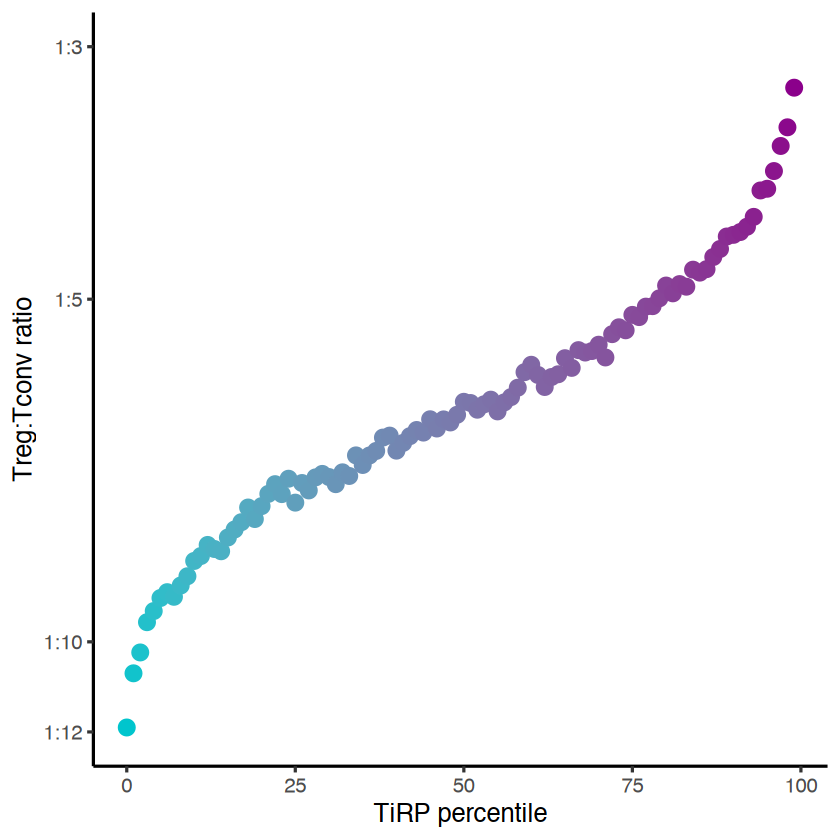

In [105]:
g = ggplot(grouped, aes(Treg_percentile, Treg_odds, color=Treg_percentile))
g = g + geom_point(size=4, show.legend=FALSE) + scale_color_gradient(low="turquoise3", high="darkmagenta") + theme_classic(base_size=15) + scale_y_continuous(limits = c((1/12), (1/3)), trans='log', breaks=c((1/12), (1/10), (1/5), (1/3)), labels=c("1:12", "1:10", "1:5", "1:3"))
g + xlab("TiRP percentile") + ylab("Treg:Tconv ratio")

In [7]:
heldout = read_heldout_TiRP()

In [12]:
heldout$TiRP = (heldout$total_score + 0.0329)/0.2364

TiRP is scaled to have mean 0 and variance 1 in these held-out data:

In [103]:
round(mean(heldout$TiRP), 2)
round(var(heldout$TiRP), 2)

[1] 0

[1] 1

**test: Treg odds ratio associated with one unit increase in TiRP**, using a mixed effects model to adjust for correlated observations within donor and site (tissue)

In [23]:
fit = glmer(cell_state ~ TiRP + (1|donor) + (1|site) + (1|donor:site), data=heldout, family="binomial")
fit0 = glmer(cell_state ~ (1|donor) + (1|site) + (1|donor:site), data=heldout, family="binomial")
an = anova(fit, fit0)
an

boundary (singular) fit: see ?isSingular



npar AIC     BIC     logLik   deviance Chisq    Df Pr(>Chisq)
fit0 4    2340855 2340907 -1170423 2340847        NA NA NA        
fit  5    2325911 2325976 -1162951 2325901  14945.79  1  0

The lme4 software gives this warning when "model parameters are on the boundary of the feasible parameter space: variances of one or more linear combinations of effects are (close to) zero" (https://cran.r-project.org/web/packages/lme4/lme4.pdf). Lme4 authors note that this frequently occurs with complex mixed-effect models, and that the true maximum likelihood estimate may indeed correspond to a singular fit. 

For a conservative estimate, however, we can simplify the random effects design by removing the nested donor:tissue intercept:

In [18]:
cfit = glmer(cell_state ~ TiRP + (1|donor) + (1|site), data=heldout, family="binomial")
cfit0 = glmer(cell_state ~ (1|donor) + (1|site), data=heldout, family="binomial")

In [20]:
anova(cfit, cfit0)
tidy(cfit)

npar AIC     BIC     logLik   deviance Chisq    Df Pr(>Chisq)
fit0 3    2361893 2361932 -1180943 2361887        NA NA NA        
fit  4    2346859 2346911 -1173425 2346851  15036.31  1  0

effect   group term            estimate   std.error   statistic  p.value     
1 fixed    NA    (Intercept)     -1.2556076 0.166652358  -7.534293 4.909896e-14
2 fixed    NA    TiRP             0.2073517 0.001699564 122.002859 0.000000e+00
3 ran_pars donor sd__(Intercept)  0.4049986          NA         NA           NA
4 ran_pars site  sd__(Intercept)  0.7211458          NA         NA           NA

In this conservative design, we still see a positive and significant association between TiRP and T cell state in these held-out data.

In [24]:
res = tidy(fit)
res

effect   group      term            estimate      std.error   statistic 
1 fixed    NA         (Intercept)     -1.577143e+00 0.201551582  -7.825007
2 fixed    NA         TiRP             2.078553e-01 0.001708915 121.629964
3 ran_pars donor:site sd__(Intercept)  1.045961e+00          NA         NA
4 ran_pars donor      sd__(Intercept)  6.401440e-05          NA         NA
5 ran_pars site       sd__(Intercept)  1.635089e-05          NA         NA
  p.value     
1 5.076268e-15
2 0.000000e+00
3           NA
4           NA
5           NA

Calculating the significance of LRT chi-squared statistic in terms of log(p):

In [15]:
lp = pchisq(an$Chisq[2], df=1, log.p=TRUE, lower.tail=FALSE)/log(10)
ex = round(lp, 0)

In [17]:
round(10^(lp - ex), 1)
ex

[1] 2.4

[1] -3248

*P* = 2.4 x $10^{-3248}$

Exponentiating and generating the 95% confidence interval for the OR per unit increase in TiRP:

In [30]:
round(exp(res$estimate[2]), 2)

[1] 1.23

In [29]:
paste(round(exp(res$estimate[2] + qnorm(0.025)*res$std.error[2]), 3), round(exp(res$estimate[2] + qnorm(0.975)*res$std.error[2]), 3), sep=" - ")

[1] "1.227 - 1.235"

**test: Treg odds ratio between top and bottom TiRP deciles**, using a mixed effects model as before

In [31]:
top_dec = quantile(heldout$TiRP, probs=c(0.9))
bottom_dec = quantile(heldout$TiRP, probs=c(0.1))

In [32]:
tb = heldout[heldout$TiRP < bottom_dec | heldout$TiRP > top_dec,]
tb$decile = ifelse(tb$TiRP < bottom_dec, "bottom", "top")

In [33]:
fit = glmer(cell_state ~ decile + (1|donor) + (1|site) + (1|donor:site), data=tb, family="binomial")
fit0 = glmer(cell_state ~ (1|donor) + (1|site) + (1|donor:site), data=tb, family="binomial")
an = anova(fit, fit0)

boundary (singular) fit: see ?isSingular



npar AIC      BIC      logLik    deviance Chisq    Df Pr(>Chisq)
fit0 4    478460.8 478506.3 -239226.4 478452.8       NA NA NA        
fit  5    469778.6 469835.5 -234884.3 469768.6 8684.201  1  0

Once again, we can simplify the random effects design to compute a conservative estimate of the Treg OR between top and bottom TiRP deciles (see note on the lme4 singular fit message above).

In [34]:
cfit = glmer(cell_state ~ decile + (1|donor) + (1|site), data=tb, family="binomial")
cfit0 = glmer(cell_state ~ (1|donor) + (1|site), data=tb, family="binomial")
tidy(cfit)
anova(cfit, cfit0)

effect   group term            estimate   std.error   statistic p.value      
1 fixed    NA    (Intercept)     -1.6114841 0.046388644 -34.73876 2.048602e-264
2 fixed    NA    deciletop        0.7178330 0.007637558  93.98723  0.000000e+00
3 ran_pars donor sd__(Intercept)  0.4059488          NA        NA            NA
4 ran_pars site  sd__(Intercept)  0.7315200          NA        NA            NA

npar AIC      BIC      logLik    deviance Chisq    Df Pr(>Chisq)
cfit0 3    482672.0 482706.1 -241333.0 482666.0       NA NA NA        
cfit  4    473942.4 473987.9 -236967.2 473934.4 8731.612  1  0

In [43]:
round(exp(0.7178330), 5)
paste(round(exp(0.7178330 + qnorm(0.025)*0.007637558), 3), round(exp(0.7178330 + qnorm(0.975)*0.007637558), 3), sep=" - ")

[1] 2.04999

[1] "2.02 - 2.081"

Conservatively, top decile TiRP TCRs demonstrate more than 2 times the odds of Treg status compared to bottom decile TiRP TCRs in these held-out data.

In [40]:
res = tidy(fit)
res

effect   group      term            estimate      std.error   statistic
1 fixed    NA         (Intercept)     -1.935814e+00 0.046339998 -41.77415
2 fixed    NA         deciletop        7.196134e-01 0.007685038  93.63823
3 ran_pars donor:site sd__(Intercept)  1.033014e+00          NA        NA
4 ran_pars donor      sd__(Intercept)  4.689073e-05          NA        NA
5 ran_pars site       sd__(Intercept)  1.303050e-03          NA        NA
  p.value
1  0     
2  0     
3 NA     
4 NA     
5 NA

Exponentiating and generating the 95% confidence interval for the Treg OR between top and bottom TiRP deciles:

In [42]:
round(exp(res$estimate[2]), 2)
paste(round(exp(res$estimate[2] + qnorm(0.025)*res$std.error[2]), 3), round(exp(res$estimate[2] + qnorm(0.975)*res$std.error[2]), 3), sep=" - ")

[1] 2.05

[1] "2.023 - 2.085"

### *Testing TiRP in the tumor microenvironment*

We then tested TiRP in single cell RNA sequencing data collected from the tumor microenvironement in two separate studies (Azizi et al. 2018: https://www.sciencedirect.com/science/article/pii/S0092867418307232, and Yost et al. 2019: https://www.nature.com/articles/s41591-019-0522-3).

(all TiRP scores generated via code in *TiRP.R*)

For visualization, we have pre-computed the mean OR for each decile of TiRP in these data, and 95% CI via bootstrapping.

In [44]:
tmg = readRDS(paste(path_to_results, "TiRP_scoring/tumor_microenvironment_TiRP_decilegroups.rds", sep="/"))

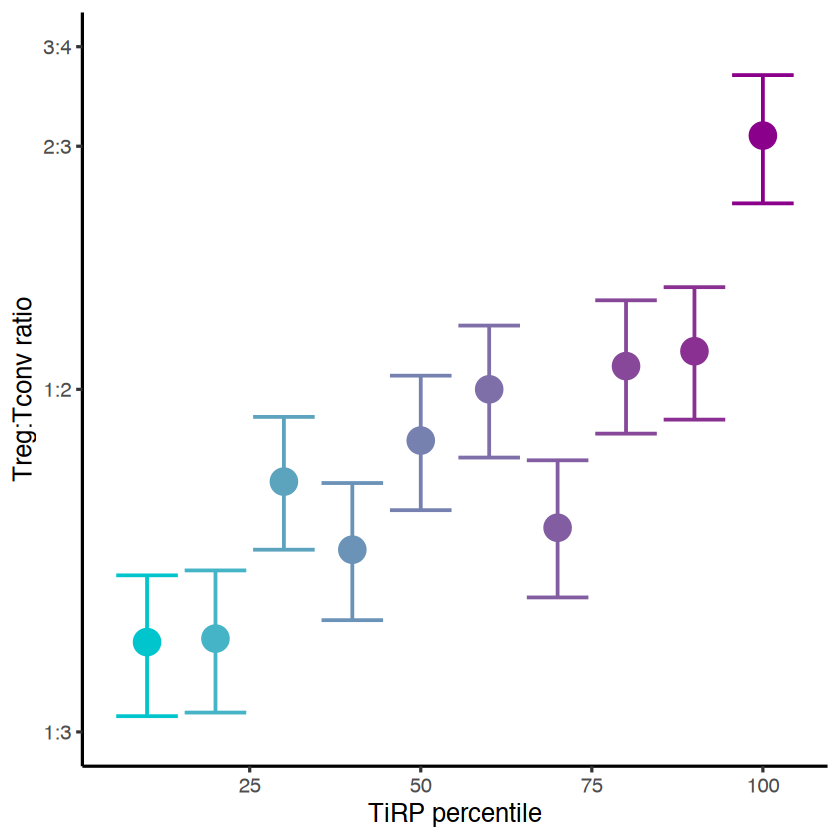

In [45]:
g = ggplot(tmg, aes(TiRP_decile, Treg_odds, color=TiRP_decile))
g = g + geom_point(show.legend=FALSE, size=7) + geom_errorbar(aes(ymin=minCI, ymax=maxCI), show.legend = FALSE, size=0.8) + theme_classic(base_size=15) + scale_color_gradient(low="turquoise3", high="darkmagenta")
g = g + scale_y_continuous(limits = c((1/3), (3/4)), trans='log', breaks=c((1/3), (1/2), (2/3), (3/4)), labels=c("1:3", "1:2", "2:3", "3:4"))
g + xlab("TiRP percentile") + ylab("Treg:Tconv ratio")

In [46]:
tm = readRDS(paste(path_to_results, "TiRP_scoring/tumor_microenvironment_TiRP.rds", sep="/"))

**test: Treg odds ratio associated with one unit increase in TiRP**, using a mixed effects model to adjust for correlated observations within patient and cancer type

In [47]:
tm$pheno = factor(tm$pheno, levels=c("Tconv", "Treg"))
fit = glmer(pheno ~ TiRP + (1|patient) + (1|dataset), data=tm, family="binomial")
fit0 = glmer(pheno ~ (1|patient) + (1|dataset), data=tm, family="binomial")
an = anova(fit, fit0)

boundary (singular) fit: see ?isSingular

boundary (singular) fit: see ?isSingular



Once again, we can simplify the random effects design to compute a conservative estimate of the Treg OR between top and bottom TiRP deciles (see note on the lme4 singular fit message above).

In [48]:
cfit = glmer(pheno ~ TiRP + (1|patient), data=tm, family="binomial")
cfit0 = glmer(pheno ~ (1|patient), data=tm, family="binomial")

In [52]:
tidy(cfit)

effect   group   term            estimate   std.error statistic p.value     
1 fixed    NA      (Intercept)     -0.5652848 0.2306514 -2.450819 1.425316e-02
2 fixed    NA      TiRP             0.1480290 0.0142964 10.354290 4.001460e-25
3 ran_pars patient sd__(Intercept)  0.9445570        NA        NA           NA

In [54]:
exp(0.1480290)

[1] 1.159547

Conservatively, one unit increase in TiRP (equal to one standard deviation in the held-out TCRs from the discovery and replication cohorts) corresponds to a 15.9% increase in odds of Treg phenotype in these tumor microenvironment data (*P* = 4.0 x $10^{-25}$).

In [55]:
res = tidy(fit)
res

effect   group   term            estimate   std.error  statistic p.value     
1 fixed    NA      (Intercept)     -0.5652733 0.23041666 -2.453266 1.415657e-02
2 fixed    NA      TiRP             0.1480287 0.01429629 10.354344 3.999172e-25
3 ran_pars patient sd__(Intercept)  0.9445586         NA        NA           NA
4 ran_pars dataset sd__(Intercept)  0.0000000         NA        NA           NA

Exponentiating and generating the 95% confidence interval for the Treg OR associated with one unit increase in TiRP in these tumor microenvironment data:

In [57]:
round(exp(res$estimate[2]), 2)
paste(round(exp(res$estimate[2] + qnorm(0.025)*res$std.error[2]), 2), round(exp(res$estimate[2] + qnorm(0.975)*res$std.error[2]), 2), sep=" - ")

[1] 1.16

[1] "1.13 - 1.19"

**test: Treg odds ratio between top and bottom TiRP deciles**, using a mixed effects model as before

In [58]:
top_dec = quantile(tm$TiRP, probs=c(0.9))
bottom_dec = quantile(tm$TiRP, probs=c(0.1))

In [61]:
tb = tm[tm$TiRP < bottom_dec | tm$TiRP > top_dec,]
tb$decile = ifelse(tb$TiRP < bottom_dec, "bottom", "top")

In [64]:
fit = glmer(pheno ~ decile + (1|patient) + (1|dataset), data=tb, family="binomial")
fit0 = glmer(pheno ~ (1|patient) + (1|dataset), data=tb, family="binomial")

In [65]:
res = tidy(fit)
res

effect   group   term            estimate   std.error  statistic p.value     
1 fixed    NA      (Intercept)     -0.7901621 0.29658322 -2.664217 7.716778e-03
2 fixed    NA      deciletop        0.5245839 0.06169586  8.502741 1.851659e-17
3 ran_pars patient sd__(Intercept)  0.8641503         NA        NA           NA
4 ran_pars dataset sd__(Intercept)  0.2673843         NA        NA           NA

Exponentiating and generating the 95% confidence interval:

In [69]:
round(exp(res$estimate[2]), 2)
paste(round(exp(res$estimate[2] + qnorm(0.025)*res$std.error[2]), 2), round(exp(res$estimate[2] + qnorm(0.975)*res$std.error[2]), 2), sep=" - ")

[1] 1.69

[1] "1.5 - 1.91"

### *Testing TiRP in the thymus*

We then tested TiRP in single cell RNA sequencing data collected from adult and fetal thymi (Park et al. 2020: https://www.science.org/doi/abs/10.1126/science.aay3224).

(all TiRP scores generated via code in *TiRP.R*)

As for the tumor microenvironment analysis, we have pre-computed the mean OR for each decile of TiRP in these data and its 95% CI via bootstrapping.

In [71]:
tmg = readRDS(paste(path_to_results, "TiRP_scoring/park2020_TiRP_decilegroups.rds", sep="/"))

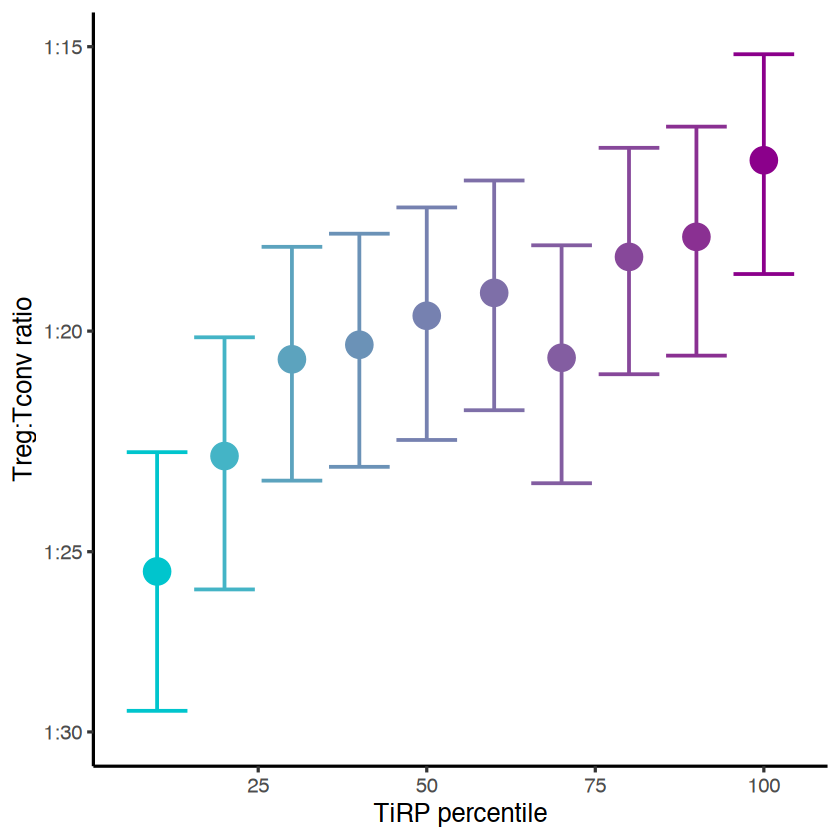

In [73]:
g = ggplot(tmg, aes(TiRP_decile, Treg_odds, color=TiRP_decile))
g = g + geom_point(show.legend=FALSE, size=7) + geom_errorbar(aes(ymin=minCI, ymax=maxCI), size=0.8, show.legend = FALSE) + theme_classic(base_size=15) + scale_color_gradient(low="turquoise3", high="darkmagenta")
g = g + scale_y_continuous(limits = c((1/30), (1/15)), trans='log', breaks=c((1/30), (1/25), (1/20), (1/15)), labels=c("1:30", "1:25", "1:20", "1:15"))
g + xlab("TiRP percentile") + ylab("Treg:Tconv ratio")

In [74]:
th = readRDS(paste(path_to_results, "TiRP_scoring/park2020_TiRP.rds", sep="/"))

In [76]:
th$sample = th$FileName

In [78]:
th$TiRP = th$sTiRP

**test: Treg odds ratio associated with one unit increase in TiRP**, using a mixed effects model to adjust for correlated observations within patient and sample

In [79]:
fit = glmer(isTreg ~ TiRP + (1|DonorID) + (1|sample), data=th, family="binomial")
fit0 = glmer(isTreg ~ (1|DonorID) + (1|sample), data=th, family="binomial")

In [80]:
res = tidy(fit)
res

effect   group   term            estimate    std.error  statistic 
1 fixed    NA      (Intercept)     -3.14123280 0.20579517 -15.263880
2 fixed    NA      TiRP             0.08677074 0.01765133   4.915819
3 ran_pars sample  sd__(Intercept)  0.34449581         NA         NA
4 ran_pars DonorID sd__(Intercept)  0.62452709         NA         NA
  p.value     
1 1.330935e-52
2 8.841211e-07
3           NA
4           NA

Exponentiating and generating the 95% confidence interval for the Treg OR associated with one unit increase in TiRP:

In [81]:
round(exp(res$estimate[2]), 2)
paste(round(exp(res$estimate[2] + qnorm(0.025)*res$std.error[2]), 2), round(exp(res$estimate[2] + qnorm(0.975)*res$std.error[2]), 2), sep=" - ")

[1] 1.09

[1] "1.05 - 1.13"

In [82]:
top_dec = quantile(th$TiRP, probs=c(0.9))
bottom_dec = quantile(th$TiRP, probs=c(0.1))
tb = th[th$TiRP < bottom_dec | th$TiRP > top_dec,]
tb$decile = ifelse(tb$TiRP < bottom_dec, "bottom", "top")

In [85]:
fit = glmer(isTreg ~ decile + (1|DonorID) + (1|sample), data=tb, family="binomial")
fit0 = glmer(isTreg ~ (1|DonorID) + (1|sample), data=tb, family="binomial")
res = tidy(fit)
res

effect   group   term            estimate   std.error  statistic p.value     
1 fixed    NA      (Intercept)     -3.3110812 0.18814414 -17.59864 2.523061e-69
2 fixed    NA      deciletop        0.4042126 0.08981007   4.50075 6.771427e-06
3 ran_pars sample  sd__(Intercept)  0.3232647         NA        NA           NA
4 ran_pars DonorID sd__(Intercept)  0.5056890         NA        NA           NA

Exponentiating and generating the 95% confidence interval for the Treg OR between the top and bottom TiRP deciles:

In [86]:
round(exp(res$estimate[2]), 2)
paste(round(exp(res$estimate[2] + qnorm(0.025)*res$std.error[2]), 2), round(exp(res$estimate[2] + qnorm(0.975)*res$std.error[2]), 2), sep=" - ")

[1] 1.5

[1] "1.26 - 1.79"

We then tested TiRP in bulk sequencing of flow-sorted single-positive (SP) CD4+ T cells collected from humanized mice (Khosravi-Maharlooei et al. 2019: https://www.jci.org/articles/view/124358).

(all TiRP scores generated via code in *TiRP.R*)

In [87]:
km = readRDS(paste(path_to_results, "TiRP_scoring/km2019_TiRP.rds", sep="/"))

In [88]:
km$total_score = km$length_score + km$vgene_score + km$pos4_score + km$perc_score + km$pos_score + km$Jseq_score + km$'pos.6_score'

##standardizing TiRP such that 0 corresponds to the mean TiRP of the held-out TCRs from the discovery and 
##replication cohorts, and one unit corresponds to one standard deviation in those held-out data:
km$TiRP = (km$total_score + 0.0329)/0.2364

ptls = quantile(km$TiRP, probs=seq(0.01, 1, by=0.01))
km$TiRP_percentile = sapply(km$TiRP, function(x) get_percentile(x))
grouped = km %>% group_by(TiRP_percentile) %>% dplyr::summarise(Treg_odds = length(cell_state[cell_state=="Treg"])/length(cell_state[cell_state!="Treg"]))

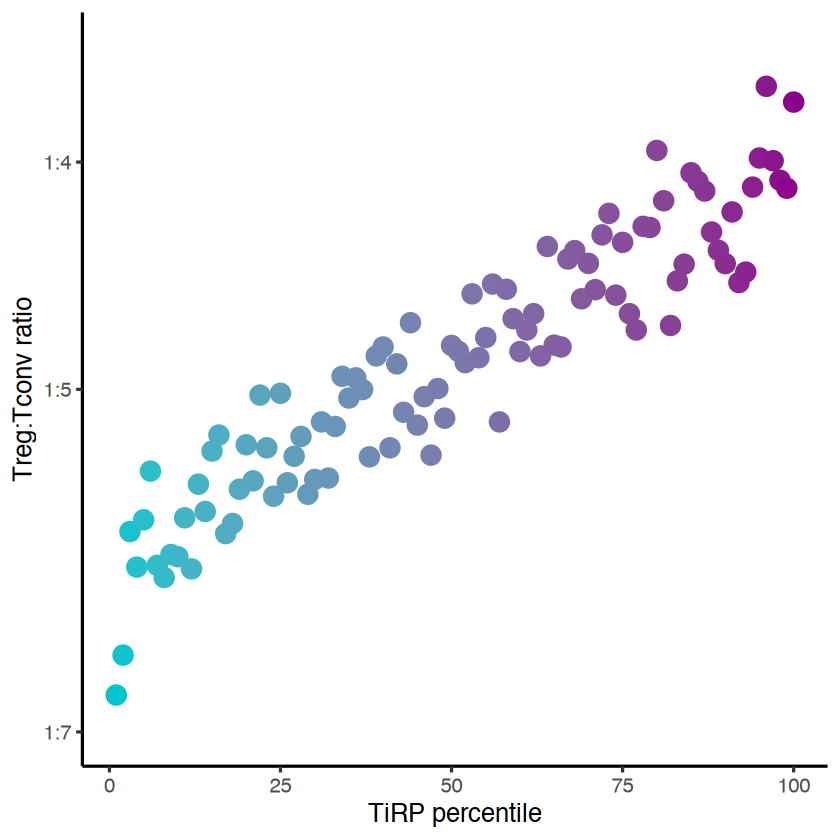

In [89]:
g = ggplot(grouped, aes(TiRP_percentile, Treg_odds, color=TiRP_percentile))
g = g + geom_point(show.legend=FALSE, size=5) + theme_classic(base_size=15) + scale_color_gradient(low="turquoise3", high="darkmagenta")
g = g + scale_y_continuous(limits = c((1/7), 0.28), trans='log', breaks=c((1/7), (1/5), (1/4)), labels=c("1:7", "1:5", "1:4"))
g + xlab("TiRP percentile") + ylab("Treg:Tconv ratio")

**test: Treg odds ratio associated with one unit increase in TiRP**, using a mixed effects model to adjust for correlated observations within sample

In [92]:
km$cell_state = factor(km$cell_state, levels=c("Tconv", "Treg"))
fit = glmer(cell_state ~ TiRP + (1|donor), data=km, family="binomial")
fit0 = glmer(cell_state ~ (1|donor), data=km, family="binomial")
res = tidy(fit)
res

effect   group term            estimate   std.error   statistic p.value      
1 fixed    NA    (Intercept)     -1.7381066 0.175077640 -9.927633  3.156589e-23
2 fixed    NA    TiRP             0.1089848 0.003839593 28.384453 3.145904e-177
3 ran_pars donor sd__(Intercept)  0.5295948          NA        NA            NA

Exponentiating and generating the 95% confidence interval for the Treg OR associated with one unit increase in TiRP:

In [93]:
round(exp(res$estimate[2]), 2)
paste(round(exp(res$estimate[2] + qnorm(0.025)*res$std.error[2]), 2), round(exp(res$estimate[2] + qnorm(0.975)*res$std.error[2]), 2), sep=" - ")

[1] 1.12

[1] "1.11 - 1.12"

**test: Treg odds ratio between the top and bottom TiRP deciles**, using a mixed effects model as above to adjust for correlated observations within sample

In [94]:
top_dec = quantile(km$TiRP, probs=c(0.9))
bottom_dec = quantile(km$TiRP, probs=c(0.1))
tb = km[km$TiRP < bottom_dec | km$TiRP > top_dec,]
tb$decile = ifelse(tb$TiRP < bottom_dec, "bottom", "top")

In [96]:
fit = glmer(cell_state ~ decile + (1|donor), data=tb, family="binomial")
fit0 = glmer(cell_state ~ (1|donor), data=tb, family="binomial")
res = tidy(fit)
res

effect   group term            estimate   std.error  statistic p.value     
1 fixed    NA    (Intercept)     -1.9118496 0.16330519 -11.70722 1.170560e-31
2 fixed    NA    deciletop        0.3709940 0.01789909  20.72698 1.978372e-95
3 ran_pars donor sd__(Intercept)  0.5252198         NA        NA           NA

Exponentiating and generating the 95% confidence interval for the Treg OR between top and bottom TiRP deciles:

In [97]:
round(exp(res$estimate[2]), 2)
paste(round(exp(res$estimate[2] + qnorm(0.025)*res$std.error[2]), 2), round(exp(res$estimate[2] + qnorm(0.975)*res$std.error[2]), 2), sep=" - ")

[1] 1.45

[1] "1.4 - 1.5"